## Fait par : Taha Tamir - Ayoub Alalou

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from PIL import Image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/sample_submission.csv
/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/train.csv
/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/test.csv
/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/data/data/Patient00791_Plane3_2_of_3.png
/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/data/data/Patient01089_Plane3_1_of_2.png
/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/data/data/Patient00782_Plane3_1_of_4.png
/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/data/data/Patient01483_Plane3_1_of_4.png
/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/data/data/Patient01512_Plane3_1_of_2.png
/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/data/data/Patient00767_Plane3_1_of_3.png
/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/data/data/Patient01529_Plane3_2_of_3.png
/kaggle/input/automati

In [2]:
import glob

In [3]:
root = '/kaggle/input/automatic-classification-of-fetal-ultrasound-brain'
files ='/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/data/data/'
train_data = '/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/train.csv'

In [4]:
images_files = glob.glob(files+'/*')
data = pd.read_csv(train_data)

In [5]:
def Idtofile(ID):
    for i in images_files:
        if ID in i :
            return i
data['file_path'] = data['image_name'].map(Idtofile)

In [6]:
d={}
c=0
for i in data['class'].unique():
    d[i]=c
    c+=1

In [7]:
datas = pd.get_dummies(data,columns=['class'])
datas[['class_Other','class_Trans-cerebellum','class_Trans-thalamic','class_Trans-ventricular']].values[5]

array([0, 1, 0, 0], dtype=uint8)

In [8]:
datas

,image_name,file_path,class_Other,class_Trans-cerebellum,class_Trans-thalamic,class_Trans-ventricular
0,Patient00168_Plane3_1_of_3,/kaggle/input/automatic-classification-of-feta...,0,0,1,0
1,Patient00168_Plane3_2_of_3,/kaggle/input/automatic-classification-of-feta...,0,0,1,0
2,Patient00168_Plane3_3_of_3,/kaggle/input/automatic-classification-of-feta...,0,1,0,0
3,Patient00188_Plane3_1_of_3,/kaggle/input/automatic-classification-of-feta...,0,0,1,0
4,Patient00188_Plane3_2_of_3,/kaggle/input/automatic-classification-of-feta...,0,0,0,1
...,...,...,...,...,...,...
2495,Patient01560_Plane3_1_of_4,/kaggle/input/automatic-classification-of-feta...,0,0,1,0
2496,Patient01560_Plane3_2_of_4,/kaggle/input/automatic-classification-of-feta...,0,1,0,0
2497,Patient01560_Plane3_3_of_4,/kaggle/input/automatic-classification-of-feta...,0,0,1,0
2498,Patient01560_Plane3_4_of_4,/kaggle/input/automatic-classification-of-feta...,0,0,1,0


In [9]:
np.array(Image.open(data['file_path'][1])).shape

(392, 640)

In [10]:
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

In [11]:
class Ultrasound(Dataset):
    def __init__(self, data):
        self.fpaths = data['file_path'].values
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
#         from random import shuffle, seed; seed(10); shuffle(self.fpaths)
        self.targets = data[['class_Other','class_Trans-cerebellum','class_Trans-thalamic','class_Trans-ventricular']].values
    def __len__(self): return len(self.fpaths)
    def __getitem__(self, ix):
        f = self.fpaths[ix]
        target = self.targets[ix]
        im = (cv2.imread(f)[:,:,::-1])
        im = cv2.resize(im, (224,224))
        im = torch.tensor(im/255)
#         im=im.unsqueeze(0)
#         print(im)
        im = im.permute(2,0,1)
        im = self.normalize(im) 
        return im.float().to(device), torch.tensor([target]).float().to(device)

In [12]:
datase = Ultrasound(datas)
device

'cuda'

tensor([[0., 0., 1., 0.]], device='cuda:0')


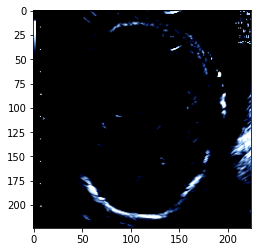

In [13]:
im, label = datase[1124]
plt.imshow(im.permute(1,2,0).cpu())
print(label)

In [14]:
def get_model():
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.fc = nn.Sequential(nn.Flatten(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 4),
    nn.Softmax())
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3)
    return model.to(device), loss_fn, optimizer

In [15]:
!pip install torch_summary
from torchsummary import summary
model, criterion, optimizer = get_model()
summary(model, torch.zeros(1,3,224,224))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-1                   [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-2                   [-1, 64, 56, 56]  

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-1                   [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-2                   [-1, 64, 56, 56]  

In [16]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
#     print(x.shape)
    prediction = model(x)
    y=y.squeeze(1)
#     print(prediction.shape)
    batch_loss = loss_fn(prediction, torch.argmax(y,1))
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [17]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    y=y.squeeze(1)
    is_correct = torch.argmax(prediction,1) == torch.argmax(y,1)
#     print(is_correct)
    return is_correct.cpu().numpy().tolist()

In [18]:
train = np.random.choice(datas['file_path'].values,2450,replace=False)
train_data = datas.loc[datas['file_path'].isin(train)]
test_data = datas.loc[~datas['file_path'].isin(train)]

In [19]:
def get_data():
    train = Ultrasound(train_data)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True, drop_last = True)
    val = Ultrasound(test_data)
    val_dl = DataLoader(val, batch_size=32, shuffle=True, drop_last = True)
    return trn_dl, val_dl

In [20]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [21]:
data['class'].value_counts(normalize=True)

Trans-thalamic       0.5332
Trans-cerebellum     0.2296
Trans-ventricular    0.1904
Other                0.0468
Name: class, dtype: float64

In [22]:
train_losses, train_accuracies = [], []
val_accuracies = []
for epoch in range(7):
    print(f" epoch {epoch + 1}/5")
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies = []

    for ix, batch in enumerate(iter(trn_dl)):
#         print(batch)
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    print(train_epoch_accuracy)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        val_epoch_accuracies.extend(val_is_correct)
    val_epoch_accuracy = np.mean(val_epoch_accuracies)
    print(val_epoch_accuracy)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_accuracies.append(val_epoch_accuracy)

In [23]:
epochs = np.arange(7)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with ResNet18 \nand 1K training data points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim(0.95,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [24]:
sample = pd.read_csv('/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/sample_submission.csv') 
test = pd.read_csv('/kaggle/input/automatic-classification-of-fetal-ultrasound-brain/test.csv') 

In [25]:
test['file_path'] = test['image_name'].map(Idtofile)
test

,image_name,class,file_path
0,Patient01563_Plane3_1_of_3,NaN,/kaggle/input/automatic-classification-of-feta...
1,Patient01563_Plane3_2_of_3,NaN,/kaggle/input/automatic-classification-of-feta...
2,Patient01563_Plane3_3_of_3,NaN,/kaggle/input/automatic-classification-of-feta...
3,Patient01564_Plane3_1_of_2,NaN,/kaggle/input/automatic-classification-of-feta...
4,Patient01564_Plane3_2_of_2,NaN,/kaggle/input/automatic-classification-of-feta...
...,...,...,...
587,Patient01790_Plane3_2_of_2,NaN,/kaggle/input/automatic-classification-of-feta...
588,Patient01791_Plane3_1_of_3,NaN,/kaggle/input/automatic-classification-of-feta...
589,Patient01791_Plane3_2_of_3,NaN,/kaggle/input/automatic-classification-of-feta...
590,Patient01791_Plane3_3_of_3,NaN,/kaggle/input/automatic-classification-of-feta...


In [26]:
new_d={i:j for (j,i) in d.items()}
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

In [27]:
model.eval()
preds=[]
for i in test.file_path:
    im = (cv2.imread(i)[:,:,::-1])
    im = cv2.resize(im, (224,224))
    im = torch.tensor(im/255)
    im = im.permute(2,0,1)
    im = normalize(im) 
    pred = model(im.float().unsqueeze(0).to(device))
    preds.append(new_d[torch.argmax(pred,1).item()])


In [28]:
test['class'] = preds
test = test.drop('file_path',1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [29]:
test.to_csv('submission.csv',index=False)